# Ejercicio 2. Predicción del resultado de una campaña de marketing telefónica

### Por: Luisa Fernanda Bolívar Arteaga 

Un banco realiza una campaña de marketing telefónica para ofrecer un depósito a plazo fijo a sus clientes. La campaña se ha llevado a cabo durante 3 años y se han recopilado los datos de la misma. Ahora que se acerca el cuarto año, el banco quiere mejorar los resultados de la campaña y nos pide que desarrollemos una solución para predecir si un cliente contratará su producto o no. De esta forma, se pueden gestionar mejor las llamadas al centrarse en los usuarios con mayor propensión.

A continuación desarrollo el paso a paso para dar respuesta a las preguntas planteadas en el instructivo de la Entrega 1. A lo largo del notebook se encuentran títulos donde se da respuesta a las preguntas ; de igual forma, al finalizar consolido las mismas para facilidad de lectura. 

### Paso 1. Importar paquetes de librerías y set de datos de entrenamiento y test

In [2]:
# Importamos los paquetes de las librerías necesarios
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 
%matplotlib inline

In [3]:
# Se carga el dataset de train y test
import pandas as pd

pd.read_csv ("dataset_marketing_train.csv")
pd.read_csv ("dataset_marketing_test.csv")

#renombro para fácil manejo de los dataset posteriormente

marketing_train = pd.read_csv("dataset_marketing_train.csv") 
marketing_test = pd.read_csv("dataset_marketing_test.csv")

#creo un dataset que une los datos de entrenamiento y test, con el fin único de visualizar las distribuciones del dataset completo 

marketing_dataset = pd.concat([marketing_train, marketing_test], ignore_index=True)

In [4]:
#visualizo el data set de entrenamiento para conocer su tamaño y contenido
marketing_train.head()

,edad,empleo,estado,educacion,impago,hipoteca,prestamo,tipo_contacto,mes,dia_semana,contactos_actual,contactos_anterior,resultado_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target
0,26,management,single,university.degree,no,no,no,telephone,jun,mon,3,0,nonexistent,1.4,4.865,94.465,no
1,42,technician,married,professional.course,unknown,no,no,telephone,jun,mon,9,0,nonexistent,1.4,4.865,94.465,no
2,30,admin.,married,university.degree,no,no,no,telephone,jun,mon,2,0,nonexistent,1.4,4.865,94.465,no
3,55,technician,married,basic.9y,no,no,no,telephone,jun,mon,3,0,nonexistent,1.4,4.865,94.465,no
4,41,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,2,0,nonexistent,1.4,4.865,94.465,no


In [5]:
#visualizo el data set de test para conocer su tamaño y contenido
marketing_test.head()

,edad,empleo,estado,educacion,impago,hipoteca,prestamo,tipo_contacto,mes,dia_semana,contactos_actual,contactos_anterior,resultado_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no


# Información general de los datos

In [6]:
# Consulta para ver el tamaño de filas y columnas de cada dataset, confirmando los datos dados en las instrucciones de la entrega

marketing_train.shape, marketing_test.shape

((32652, 17), (8536, 17))

In [7]:
# Consula para visualizar el tipo de variables que contiene el dataset y el nombre de cada una
marketing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32652 entries, 0 to 32651
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                32652 non-null  int64  
 1   empleo              32652 non-null  object 
 2   estado              32652 non-null  object 
 3   educacion           32652 non-null  object 
 4   impago              32652 non-null  object 
 5   hipoteca            32652 non-null  object 
 6   prestamo            32652 non-null  object 
 7   tipo_contacto       32652 non-null  object 
 8   mes                 32652 non-null  object 
 9   dia_semana          32652 non-null  object 
 10  contactos_actual    32652 non-null  int64  
 11  contactos_anterior  32652 non-null  int64  
 12  resultado_anterior  32652 non-null  object 
 13  tasa_var_empleo_3m  32652 non-null  float64
 14  euribor_3m          32652 non-null  float64
 15  ipc_1m              32652 non-null  float64
 16  targ

In [8]:
# Consula para visualizar el tipo de variables que contiene el dataset y el nombre de cada una
marketing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                8536 non-null   int64  
 1   empleo              8536 non-null   object 
 2   estado              8536 non-null   object 
 3   educacion           8536 non-null   object 
 4   impago              8536 non-null   object 
 5   hipoteca            8536 non-null   object 
 6   prestamo            8536 non-null   object 
 7   tipo_contacto       8536 non-null   object 
 8   mes                 8536 non-null   object 
 9   dia_semana          8536 non-null   object 
 10  contactos_actual    8536 non-null   int64  
 11  contactos_anterior  8536 non-null   int64  
 12  resultado_anterior  8536 non-null   object 
 13  tasa_var_empleo_3m  8536 non-null   float64
 14  euribor_3m          8536 non-null   float64
 15  ipc_1m              8536 non-null   float64
 16  target

In [9]:
# Consula para visualizar la estadística descriptiva del data set de entrenamiento
marketing_train.describe()

,edad,contactos_actual,contactos_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m
count,32652.000000,32652.000000,32652.000000,32652.000000,32652.000000,32652.000000
mean,39.930081,2.595461,0.193281,-0.117987,3.393421,93.463533
std,10.592293,2.819542,0.500932,1.658776,1.787415,0.601256
min,17.000000,1.000000,0.000000,-3.400000,0.634000,92.201000
25%,32.000000,1.000000,0.000000,-1.800000,1.313000,92.893000
50%,38.000000,2.000000,0.000000,-0.100000,4.474000,93.444000
75%,47.000000,3.000000,0.000000,1.400000,4.962000,93.918000
max,98.000000,43.000000,7.000000,1.400000,5.045000,94.767000


In [10]:
# Consula para visualizar la estadística descriptiva del data set de entrenamiento
marketing_test.describe()

,edad,contactos_actual,contactos_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m
count,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000
mean,40.383552,2.460989,0.095244,0.846439,4.492942,94.004589
std,9.731511,2.569138,0.462991,0.803588,1.156078,0.042392
min,18.000000,1.000000,0.000000,-1.700000,0.702000,93.994000
25%,33.000000,1.000000,0.000000,1.100000,4.856000,93.994000
50%,39.000000,2.000000,0.000000,1.100000,4.857000,93.994000
75%,47.000000,3.000000,0.000000,1.100000,4.858000,93.994000
max,92.000000,56.000000,6.000000,1.100000,4.864000,94.215000


### Contenido de las variables 

In [11]:
# Veamos los valores de las variables categóricas

for col in ['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo', 'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior', 'target']:
    print(marketing_train[col].value_counts())
    print('')

empleo
admin.           8575
blue-collar      6901
technician       5573
services         2990
management       2324
retired          1409
entrepreneur     1153
self-employed    1144
housemaid         813
unemployed        812
student           737
unknown           221
Name: count, dtype: int64

estado
married     19383
single       9559
divorced     3645
unknown        65
Name: count, dtype: int64

educacion
university.degree      10240
high.school             7475
basic.9y                4564
professional.course     4263
basic.4y                3108
basic.6y                1682
unknown                 1304
illiterate                16
Name: count, dtype: int64

impago
no         26520
unknown     6129
yes            3
Name: count, dtype: int64

hipoteca
yes        17584
no         14316
unknown      752
Name: count, dtype: int64

prestamo
no         26897
yes         5003
unknown      752
Name: count, dtype: int64

tipo_contacto
cellular     25552
telephone     7100
Name: count, dty

In [12]:
# Veamos los valores de las variables categóricas

for col in ['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo', 'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior', 'target']:
    print(marketing_test[col].value_counts())
    print('')

empleo
blue-collar      2353
admin.           1847
technician       1170
services          979
management        600
retired           311
entrepreneur      303
self-employed     277
housemaid         247
unemployed        202
student           138
unknown           109
Name: count, dtype: int64

estado
married     5545
single      2009
divorced     967
unknown       15
Name: count, dtype: int64

educacion
high.school            2040
university.degree      1928
basic.9y               1481
basic.4y               1068
professional.course     980
basic.6y                610
unknown                 427
illiterate                2
Name: count, dtype: int64

impago
no         6068
unknown    2468
Name: count, dtype: int64

hipoteca
no         4306
yes        3992
unknown     238
Name: count, dtype: int64

prestamo
no         7053
yes        1245
unknown     238
Name: count, dtype: int64

tipo_contacto
telephone    7944
cellular      592
Name: count, dtype: int64

mes
may    7763
jul     311


# Preprocesamiento de datos

### Duplicados 
Como se observa hay duplicados, no obstante no hay ID, entonces conservo los registros, pues no es posible verificar que efectivamente son duplicados

In [13]:
# Identificar duplicados en el conjunto de entrenamiento
duplicados_train = marketing_train[marketing_train.duplicated()]

# Identificar duplicados en el conjunto de prueba
duplicados_test = marketing_test[marketing_test.duplicated()]

# Mostrar información sobre duplicados
print("Duplicados en el conjunto de entrenamiento:")
print(duplicados_train)

print("\nDuplicados en el conjunto de prueba:")
print(duplicados_test)

Duplicados en el conjunto de entrenamiento:
       edad       empleo   estado            educacion   impago hipoteca  \
59       40       admin.  married    university.degree  unknown      yes   
87       30     services  married          high.school       no       no   
224      39  blue-collar  married             basic.9y       no       no   
264      33       admin.  married          high.school       no      yes   
541      30  blue-collar  married             basic.6y       no       no   
...     ...          ...      ...                  ...      ...      ...   
31901    40       admin.   single             basic.9y       no      yes   
32139    27   technician   single    university.degree       no      yes   
32270    35   technician  married  professional.course       no      yes   
32304    32       admin.   single    university.degree       no      yes   
32570    32       admin.   single          high.school       no       no   

      prestamo tipo_contacto  mes dia_seman

### Nulos

Como se observa, no se identifican campos nulos

In [14]:
valores_nulos = marketing_dataset.isnull()

# Suma de los valores nulos por columna
total_nulos_por_columna = valores_nulos.sum()

# Suma de los valores nulos por fila (si es necesario)
total_nulos_por_fila = valores_nulos.sum(axis=1)


# Mostrar resultados
print("Valores nulos por columna:")
print(total_nulos_por_columna)


print("\nValores nulos por fila:")
print(total_nulos_por_fila)

Valores nulos por columna:
edad                  0
empleo                0
estado                0
educacion             0
impago                0
hipoteca              0
prestamo              0
tipo_contacto         0
mes                   0
dia_semana            0
contactos_actual      0
contactos_anterior    0
resultado_anterior    0
tasa_var_empleo_3m    0
euribor_3m            0
ipc_1m                0
target                0
dtype: int64

Valores nulos por fila:
0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Length: 41188, dtype: int64


# Análisis general de la información

### Ratio de conversión (porcentaje de clientes que contratan) de la campaña en el conjunto de entrenamiento (Pregunta 1)

In [15]:
clientes_contratan = marketing_train[marketing_train['target']== 'yes'].shape[0]

clientes_contactados = marketing_train.shape[0]

ratio_conversion = (clientes_contratan/clientes_contactados)*100
ratio_conversion

12.241210339336028

Como se observa, el ratio de conversión es del 12%. Es decir, solo el 12% de los clientes contactados contrataron el crédito 

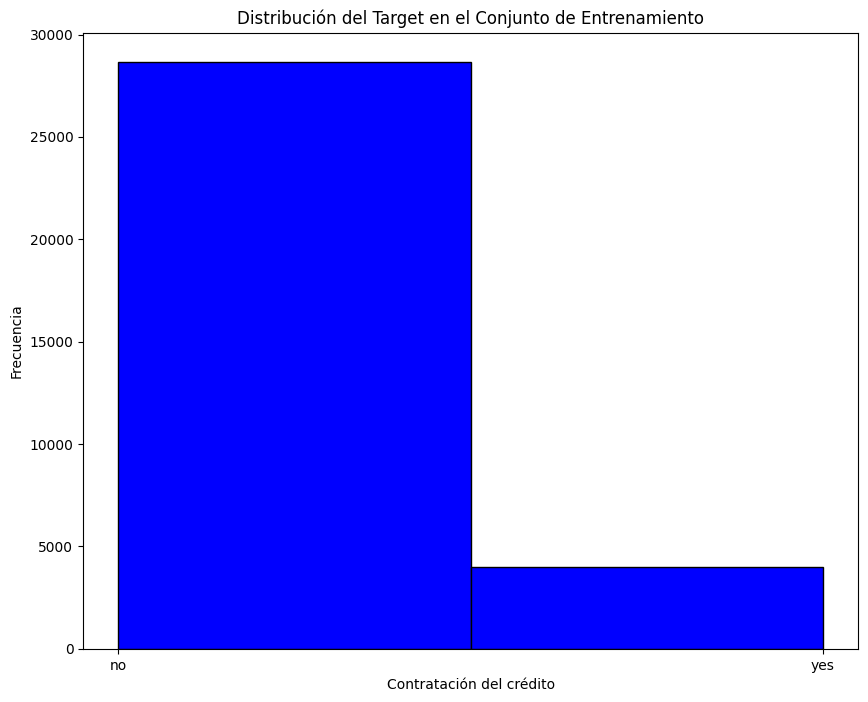

In [16]:
## Distribución del target

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un histograma
plt.hist(marketing_train['target'], bins=2, color='blue', edgecolor='black')

# Configuración de etiquetas y título
plt.title('Distribución del Target en el Conjunto de Entrenamiento')
plt.xlabel('Contratación del crédito')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Como se observa, la mayoría de registros corresponden a contactos que no resultaron en la contratación del servicio 

### ¿Cómo influye el día de la semana de contacto en el resultado de la campaña? ¿Y el mes? (Pregunta 2)

Como se observa en el siguiente gráfico, parece que el día no tiene influencia en el resultado de la campaña, puesto que su distribución es similar a lo largo de los días. 

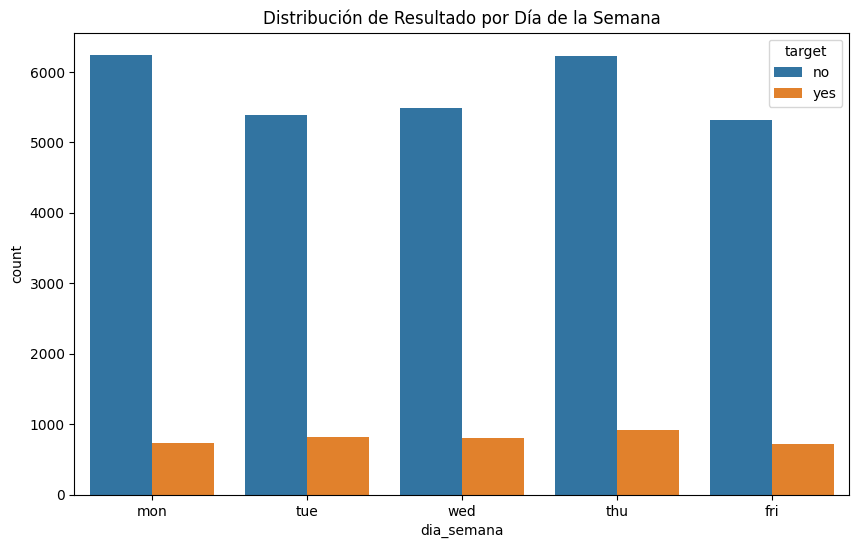

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dia_semana', hue='target', data=marketing_train)
plt.title('Distribución de Resultado por Día de la Semana')
plt.show()



Por su parte, el siguiente gráfico muestra la influencia entre el resultado de la campaña y el mes, donde la distribución no parece variar significativamente entre los meses de contacto

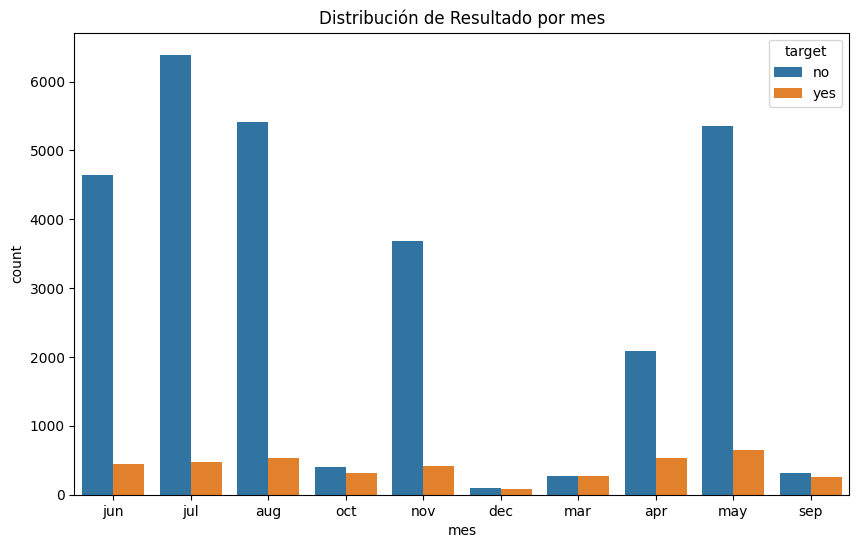

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mes', hue='target', data=marketing_train)
plt.title('Distribución de Resultado por mes')
plt.show()

# Preprocesamiento de los datos

### Conversión de columna target a binario

In [19]:
# convierto la variable target (contrató si o no) a binario 1 o 0, para ambost datasets

marketing_train['target'] = marketing_train['target'].map({'yes': 1, 'no': 0})
marketing_test['target'] = marketing_test['target'].map({'yes': 1, 'no': 0})

In [20]:
# confirmo que coincida con el contenido de variables del dataset de train

for col in ['target']:
    print(marketing_train[col].value_counts())
    print('')

target
0    28655
1     3997
Name: count, dtype: int64



In [21]:
# confirmo que coincida con el contenido de variables del dataset de test
for col in ['target']:
    print(marketing_test[col].value_counts())
    print('')

target
0    7893
1     643
Name: count, dtype: int64



### Aislar variable dependiente (target) de las independientes (características)

Aquí se separa cada dataset entre las variables características (independientes al resultado de la campaña) y la variable objetivo (target), como la variable dependiente de aquellas características. Esto con el fin de entrenar el modelo para predecir la variable objetivo a partir de las características. El modelo aprenderá patrones y relaciones en los datos durante esta fase de entrenamiento.

In [22]:
x_train = marketing_train.drop('target', axis=1)  # aislar las variables de la variable target en un dataframe: se dejan todas las columnas excepto 'precio'
y_train = marketing_train['target']  # Se toma la columna 'target' como la variable objetivo (target), esta será usada en el entrenamiento del modelo

x_test = marketing_test.drop('target', axis=1)  # aislar las variables de la variable target en un dataframe: se dejan todas las columnas excepto 'precio'
y_test = marketing_test['target']  # Se toma la columna 'precio' como la variable objetivo (target), estas será usada en la prueba del modelo



In [23]:
# confirmo que el dataset x_train ya no contiene la variable target 
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32652 entries, 0 to 32651
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                32652 non-null  int64  
 1   empleo              32652 non-null  object 
 2   estado              32652 non-null  object 
 3   educacion           32652 non-null  object 
 4   impago              32652 non-null  object 
 5   hipoteca            32652 non-null  object 
 6   prestamo            32652 non-null  object 
 7   tipo_contacto       32652 non-null  object 
 8   mes                 32652 non-null  object 
 9   dia_semana          32652 non-null  object 
 10  contactos_actual    32652 non-null  int64  
 11  contactos_anterior  32652 non-null  int64  
 12  resultado_anterior  32652 non-null  object 
 13  tasa_var_empleo_3m  32652 non-null  float64
 14  euribor_3m          32652 non-null  float64
 15  ipc_1m              32652 non-null  float64
dtypes: f

In [24]:
# confirmo que el dataset x_test ya no contiene la variable target 

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                8536 non-null   int64  
 1   empleo              8536 non-null   object 
 2   estado              8536 non-null   object 
 3   educacion           8536 non-null   object 
 4   impago              8536 non-null   object 
 5   hipoteca            8536 non-null   object 
 6   prestamo            8536 non-null   object 
 7   tipo_contacto       8536 non-null   object 
 8   mes                 8536 non-null   object 
 9   dia_semana          8536 non-null   object 
 10  contactos_actual    8536 non-null   int64  
 11  contactos_anterior  8536 non-null   int64  
 12  resultado_anterior  8536 non-null   object 
 13  tasa_var_empleo_3m  8536 non-null   float64
 14  euribor_3m          8536 non-null   float64
 15  ipc_1m              8536 non-null   float64
dtypes: flo

In [25]:
y_train.shape

(32652,)

In [26]:
y_test.shape

(8536,)

In [27]:
## Confirmo Consistencia entre datasets:

assert x_train.columns.tolist() == x_test.columns.tolist(), "Las columnas de X_train y X_test no coinciden"

### Transformación de las variables categóricas y normalización de variables numéricas (Pregunta 3)

Transformo las variables categóricas en columnas one-hot 

Para el caso de la columna `Target` no lo realizo, pues esta es la variable target

1. Se utiliza la opción "column transformer" con el fin de hacer que durante el preprocesamiento se tranforme columna por columna de cada data set, incluso los nuevos datos, de texto a número o de número a escala numérica, según se defina. 

2. One-Hot Encoding: para la transformación de las variables de texto o categóricas, he utilizado la cual crea nuevas columnas, indicando la presencia (o ausencia) de cada categoría posible en la variable original

3. Escalador MinMaxScaler: con el fin de normalizar las variables númericas en una escala de 0 a 1.

4. Guardar el preprocesamiento en la variable definida "preprocessor" y posteriormente se aplica a cada dataframe de train y test. Cabe indicar que para el dataframe de test no se aplica ajuste (fit) para no generar fuga de datos

5. Nuevos dataframe: posteriormente, los datos transformados son archivados en nuevos dataframes_processed

6. Guardar el preprocessor en una "librería" = joblib



In [28]:
# Instanciar el OneHotEncoder

encoder = prep.OneHotEncoder(sparse_output = False, min_frequency = 0.01, handle_unknown = 'infrequent_if_exist')

scaler = prep.MinMaxScaler()

# Ajustar y transformar 

preprocessor_marketing = ColumnTransformer(
    transformers=[
        ('num', scaler, ['edad', 'contactos_actual', 'contactos_anterior', 'tasa_var_empleo_3m', 'euribor_3m', 'ipc_1m']),
        ('cat', encoder, ['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo', 'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior'])
    ])

# Transformar el conjunto de entrenamiento
x_train_processed = preprocessor_marketing.fit_transform(x_train)


# Transformar el conjunto de prueba
x_test_processed = preprocessor_marketing.transform(x_test) ## no ajustar el dataset de prueba

# Crear dataframes

x_train_processed_df = pd.DataFrame(x_train_processed, columns=preprocessor_marketing.get_feature_names_out())
x_test_processed_df = pd.DataFrame(x_test_processed, columns=preprocessor_marketing.get_feature_names_out())

In [29]:
# confirmo la transformación del dataset de train
x_train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32652 entries, 0 to 32651
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__edad                            32652 non-null  float64
 1   num__contactos_actual                32652 non-null  float64
 2   num__contactos_anterior              32652 non-null  float64
 3   num__tasa_var_empleo_3m              32652 non-null  float64
 4   num__euribor_3m                      32652 non-null  float64
 5   num__ipc_1m                          32652 non-null  float64
 6   cat__empleo_admin.                   32652 non-null  float64
 7   cat__empleo_blue-collar              32652 non-null  float64
 8   cat__empleo_entrepreneur             32652 non-null  float64
 9   cat__empleo_housemaid                32652 non-null  float64
 10  cat__empleo_management               32652 non-null  float64
 11  cat__empleo_retired         

In [30]:
# confirmo la transformación del dataset de test
x_test_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__edad                            8536 non-null   float64
 1   num__contactos_actual                8536 non-null   float64
 2   num__contactos_anterior              8536 non-null   float64
 3   num__tasa_var_empleo_3m              8536 non-null   float64
 4   num__euribor_3m                      8536 non-null   float64
 5   num__ipc_1m                          8536 non-null   float64
 6   cat__empleo_admin.                   8536 non-null   float64
 7   cat__empleo_blue-collar              8536 non-null   float64
 8   cat__empleo_entrepreneur             8536 non-null   float64
 9   cat__empleo_housemaid                8536 non-null   float64
 10  cat__empleo_management               8536 non-null   float64
 11  cat__empleo_retired           

In [31]:
#guardo el proceso de transformación de datos
joblib.dump(preprocessor_marketing, 'preprocessor_marketing.joblib')


['preprocessor_marketing.joblib']

# Aprendizaje automático (clasificación)

In [32]:
pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Regresión logística

In [33]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [34]:
# Creamos el objeto del modelo con parámetros por defecto, fijando la semilla para evitar aleatoriedad
logreg = LogisticRegression(random_state=42)

# Entrenamos con el conjunto de train y su target
logreg.fit(x_train_processed_df, y_train)

c:\Users\LUISA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:
logreg.coef_.shape

(1, 59)

In [36]:
print (logreg.classes_)

[0 1]


#### Desempeño del modelo

In [37]:
print('Accuracy en train: ', logreg.score(x_train_processed_df, y_train))
print('Accuracy en test: ', logreg.score(x_test_processed_df, y_test))

Accuracy en train:  0.8897770427538895
Accuracy en test:  0.9369728209934396


Obtuve un 93% de tasa de acierto en mi conjunto de test, lo cual coincide con el requerimiento del banco

#### Predicciones y probabilidades del conjunto de validación

In [38]:
preds = logreg.predict(x_test_processed_df) # predicción del conjunto de validación
y_probs = logreg.predict_proba(x_test_processed_df) # probabilidades de contratar o no, en el conjunto de test

print(preds[:5])
print(y_probs[:5])

[0 0 0 0 0]
[[0.96694764 0.03305236]
 [0.97696957 0.02303043]
 [0.97026876 0.02973124]
 [0.95858222 0.04141778]
 [0.9704247  0.0295753 ]]


In [39]:
y_probs.shape #En un arreglo de este tipo, generalmente, una columna representa la probabilidad de la clase negativa (por ejemplo, 0), y la otra la probabilidad de la clase positiva (por ejemplo, 1).

(8536, 2)

#### Otras métricas 

In [40]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Calculamos las métricas globales, con el parámetro average
precision = precision_score(y_test, preds, average = 'micro')
recall = recall_score(y_test, preds, average = 'micro')
cm = confusion_matrix(y_test, preds)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.937
Recall 0.937
[[7685  208]
 [ 330  313]]


Vemos que en este caso el modelo bueno, con una precisión y un recall por encima de 0.94. 

La matriz de confusión indica: 

En la fila 1, columna 1: Verdaderos Negativos (TN) = 7685 Instancias que son negativas y fueron clasificadas correctamente como negativas.

En la fila 1, columna 2: Falsos Positivos (FP) = 208 Instancias que son negativas pero fueron clasificadas incorrectamente como positivas.

En la fila 2, columna 1: Falsos Negativos (FN) = 330 Instancias que son positivas pero fueron clasificadas incorrectamente como negativas.

En la fila 2, columna 2: Verdaderos Positivos (TP) = 313 Instancias que son positivas y fueron clasificadas correctamente como positivas

In [41]:
# probabilidades de la clase positiva (1)

y_probs_positiva = y_probs[:, 1]

### Curva ROC del modelo y calculo de su AUC en el conjunto de test (Pregunta 4)

ROC: Se crea representando el ratio de falsos positivos (eje X) y el de verdaderos positivos (eje Y) para diferentes valores del punto de corte

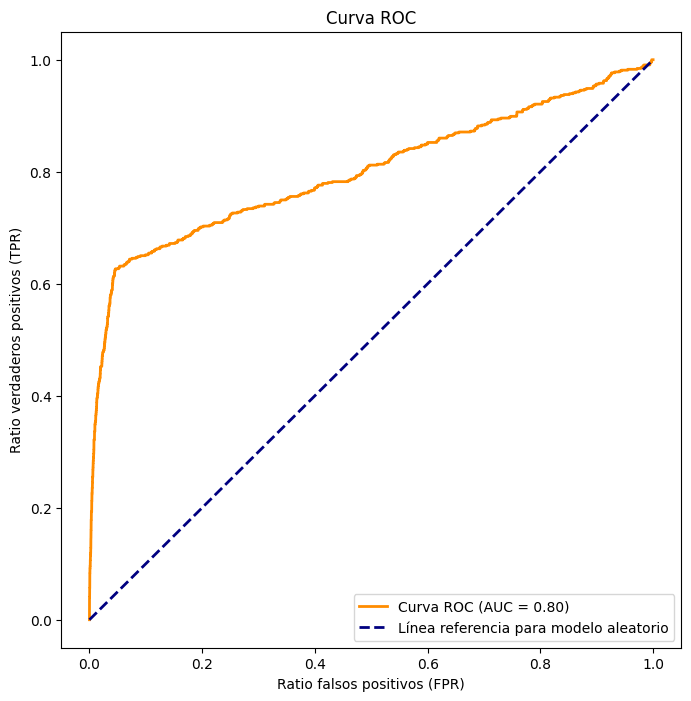

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positiva) ##fpr: false positive rates, tpr: true positive rate, thresolds: umbrales

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea referencia para modelo aleatorio')
plt.xlabel("Ratio falsos positivos (FPR)")
plt.ylabel("Ratio verdaderos positivos (TPR)")
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

El resultado AUC es 0.80, aunque está un poco lejano a 1, en problemas reales un AUC superio a 0.7 se considera un buen resultado. 

### Elegir un umbral (punto de corte) adecuado para maximizar el balance de la campaña

Necesito maximizar la precisión, es decir, maximizar la predicción de verdaderos positivos (clientes que contratan) en relación con el total de clientes contactados

Esto, identificando un punto de corte donde la probabilidad a partir de allí sea la clase positiva (contrata) como resultado de la predicción. 

Por ejemplo, un punto de corte de 0.1 indicará que todos los registros cuya probabilidad estimada sea superior a 0.1, se clasificarán como positivos.

La elección del punto de corte tiene efecto en el rendimiento del clasificador. Un punto de corte bajo hará que sea más conservador (más registros identificados positivos) que al elegir un punto de corte alto

La precisión se relaciona directamente con el número de clientes que contratan

###### Balance = 50€ x Clientes que contratan - 5€ x Clientes contactados

Umbral (Punto de corte) 0.00 | Precisión: 0.075, Recall: 1.000
Umbral (Punto de corte) 0.01 | Precisión: 0.075, Recall: 1.000
Umbral (Punto de corte) 0.02 | Precisión: 0.075, Recall: 0.991
Umbral (Punto de corte) 0.03 | Precisión: 0.085, Recall: 0.932
Umbral (Punto de corte) 0.04 | Precisión: 0.124, Recall: 0.782
Umbral (Punto de corte) 0.05 | Precisión: 0.281, Recall: 0.669
Umbral (Punto de corte) 0.06 | Precisión: 0.490, Recall: 0.630
Umbral (Punto de corte) 0.07 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.08 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.09 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.10 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.11 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.12 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.13 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.14 | Precisión: 0.521, Recall: 0.627
Umbral (Punto de corte) 0.15 | Precisión: 0.521, Recall

Umbral (Punto de corte) 0.36 | Precisión: 0.567, Recall: 0.560
Umbral (Punto de corte) 0.37 | Precisión: 0.567, Recall: 0.549
Umbral (Punto de corte) 0.38 | Precisión: 0.566, Recall: 0.547
Umbral (Punto de corte) 0.39 | Precisión: 0.568, Recall: 0.543
Umbral (Punto de corte) 0.40 | Precisión: 0.570, Recall: 0.541
Umbral (Punto de corte) 0.41 | Precisión: 0.575, Recall: 0.540
Umbral (Punto de corte) 0.42 | Precisión: 0.573, Recall: 0.530
Umbral (Punto de corte) 0.43 | Precisión: 0.576, Recall: 0.529
Umbral (Punto de corte) 0.44 | Precisión: 0.576, Recall: 0.524
Umbral (Punto de corte) 0.45 | Precisión: 0.580, Recall: 0.521
Umbral (Punto de corte) 0.46 | Precisión: 0.582, Recall: 0.518
Umbral (Punto de corte) 0.47 | Precisión: 0.590, Recall: 0.516
Umbral (Punto de corte) 0.48 | Precisión: 0.594, Recall: 0.504
Umbral (Punto de corte) 0.49 | Precisión: 0.598, Recall: 0.495
Umbral (Punto de corte) 0.51 | Precisión: 0.602, Recall: 0.482
Umbral (Punto de corte) 0.52 | Precisión: 0.613, Recall

c:\Users\LUISA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LUISA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LUISA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LUISA\AppData\Local

Umbral (Punto de corte) 0.99 | Precisión: 0.000, Recall: 0.000
Umbral (Punto de corte) 1.00 | Precisión: 0.000, Recall: 0.000


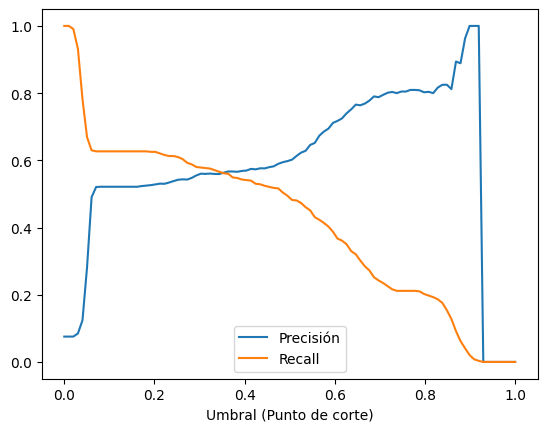

In [43]:
# umbrales (Puntos de corte) posibles
umbrales = np.linspace(0, 1, 100) 

precisions = []
recalls = []

# Probamos cada uno de ellos y calculamos sus métricas
for umbral in umbrales:
    # y_pred Es un array de predicciones binarias basadas en el umbral.
    #Si la probabilidad es mayor o igual al umbral, la predicción se establece en 1 (positivo), de lo contrario, se establece en 0 (negativo).
    y_pred = y_probs_positiva >= umbral 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precisions.append(precision)
    recalls.append(recall)
    
    print('Umbral (Punto de corte) %.2f | Precisión: %.3f, Recall: %.3f' % (umbral, precision, recall))
    
plt.plot(umbrales, precisions, label = 'Precisión')
plt.plot(umbrales, recalls, label = 'Recall')
plt.xlabel('Umbral (Punto de corte)')
plt.legend()
plt.show()


#### Como se observa, desde un umbral de 0,89, la precisión es máxima, pero el recall disminuye 

### Probar el umbral que maximiza la campaña

Me interesa probar el umbral que maximiza la campaña, para identificar a aquellos clientes que debí llamar, pues superaban el umbral de probabilidad, incrementando así aquellos que contratan sin afectar el balance. 

Así, el modelo permite hacer el filtro de aquellos clientes que superar una probabilidad óptima de contratación y llamar a ellos

In [44]:
# defino la función de cálculo

def calcular_balance(clientes_contratan, clientes_contactados): # dos argumentos: clientes_contratan y clientes_contactados.
    beneficio_por_contratacion = 50 #beneficio obtenido por cada cliente que contrata el producto (
    costo_por_llamada = 5 #costo de realizar una llamada
    balance = beneficio_por_contratacion * clientes_contratan - costo_por_llamada * clientes_contactados #calculo del balance
    return balance

# calculo el balance para cada umbral 

balances = [] # inicializo la lista de balances para que allí se guarde cada iteración
clientes_a_contactar_por_umbral = [] # inicializo los clientes a contactar por umbral
clientes_contratan_por_umbral = []
for umbral in umbrales: #bucle sobra cada umbral 
    y_pred = y_probs_positiva >= umbral #crea un array de predicciones binarias basado en si la probabilidad es mayor o igual al umbral actual
    clientes_contactados = np.sum(y_pred) #cuenta cuántos clientes serían contactados (predicciones positivas).
    clientes_contratan = np.sum(y_pred & y_test) #cuenta cuántos de los contactados realmente contratan (verdaderos positivos).
    balance = calcular_balance(clientes_contratan, clientes_contactados)
    balances.append(balance) #Se calcula el balance para el umbral actual y se añade a la lista balances.
    clientes_a_contactar_por_umbral.append(clientes_contactados)  
    clientes_contratan_por_umbral.append(clientes_contratan) 
    
    print(f"Umbral: {umbral:.2f}, Clientes a Contactar: {clientes_contactados}, Clientes contratan {clientes_contratan}, Balance: {balance}")
    
# encuentro el mejor umbral
    
indice_optimo = np.argmax(balances) #devuelve el índice del mayor valor en la lista balances, es decir, el balance más alto.
umbral_optimo = umbrales[indice_optimo] # obtiene el valor del umbral correspondiente al mejor balance.
balance_optimo = balances[indice_optimo] # obtiene el valor del balance óptimo.

print(f"Umbral óptimo: {umbral_optimo}, Balance óptimo: {balance_optimo}")



Umbral: 0.00, Clientes a Contactar: 8536, Clientes contratan 643, Balance: -10530
Umbral: 0.01, Clientes a Contactar: 8530, Clientes contratan 643, Balance: -10500
Umbral: 0.02, Clientes a Contactar: 8439, Clientes contratan 637, Balance: -10345
Umbral: 0.03, Clientes a Contactar: 7064, Clientes contratan 599, Balance: -5370
Umbral: 0.04, Clientes a Contactar: 4057, Clientes contratan 503, Balance: 4865
Umbral: 0.05, Clientes a Contactar: 1528, Clientes contratan 430, Balance: 13860
Umbral: 0.06, Clientes a Contactar: 826, Clientes contratan 405, Balance: 16120
Umbral: 0.07, Clientes a Contactar: 774, Clientes contratan 403, Balance: 16280
Umbral: 0.08, Clientes a Contactar: 773, Clientes contratan 403, Balance: 16285
Umbral: 0.09, Clientes a Contactar: 773, Clientes contratan 403, Balance: 16285
Umbral: 0.10, Clientes a Contactar: 773, Clientes contratan 403, Balance: 16285
Umbral: 0.11, Clientes a Contactar: 773, Clientes contratan 403, Balance: 16285
Umbral: 0.12, Clientes a Contact

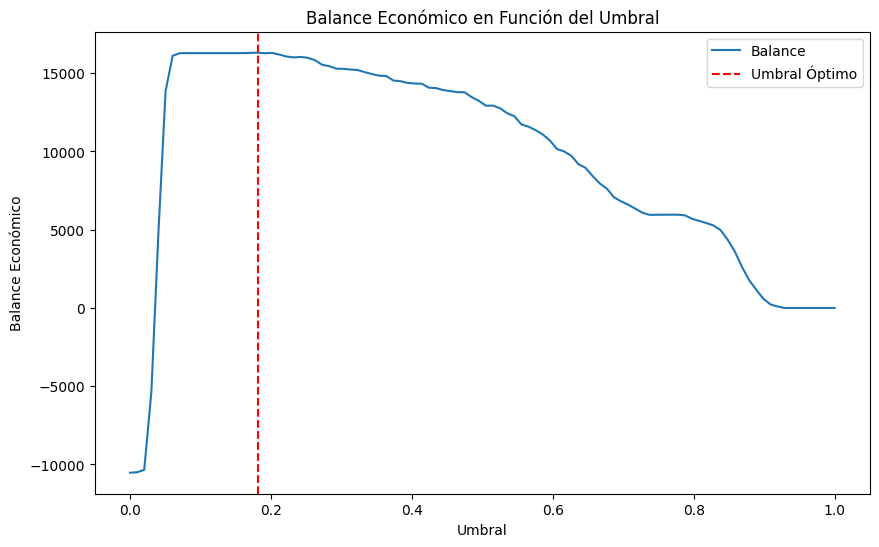

In [45]:
# visualización gráfica del balance para cada umbral

plt.figure(figsize=(10, 6))
plt.plot(umbrales, balances, label='Balance')
plt.xlabel('Umbral')
plt.ylabel('Balance Económico')
plt.title('Balance Económico en Función del Umbral')
plt.axvline(x=umbrales[np.argmax(balances)], color='r', linestyle='--', label='Umbral Óptimo')
plt.legend()
plt.show()

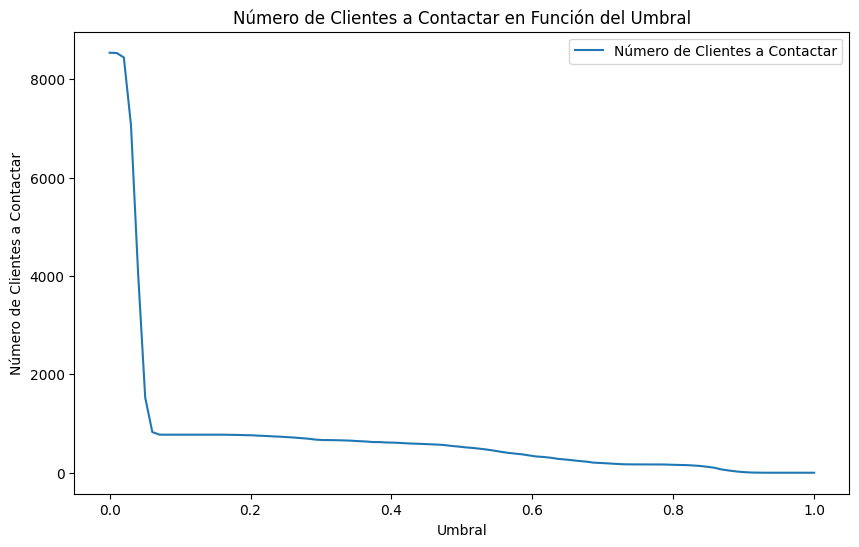

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(umbrales, clientes_a_contactar_por_umbral, label='Número de Clientes a Contactar')
plt.xlabel('Umbral')
plt.ylabel('Número de Clientes a Contactar')
plt.title('Número de Clientes a Contactar en Función del Umbral')
plt.legend()
plt.show()

### Pregunta 5. 

Como se observa, el mejor umbral no resulta ser el umbral que permite obtener mayor precisión. El mejor umbral resulta ser el que encuentra un balance entre la precisión y el recall, siendo de 0.18. Así, el modelo nos indica que la campaña hubiera llamado 768 clentes de los cuales 403 hubieran contratado, obteniendo un balance máximo de 16310 euros. 

Resumen de resultados: Umbral: 0.18, Clientes a Contactar: 768, Clientes contratan 403, Balance: 16310

### PROBAR CON OTROS ALGORITMOS 

#### Árbol de decisión 

In [47]:
# importo

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# Los inicialiamos con sus parámetros por defecto (salvo la semilla)
tree_class = DecisionTreeClassifier(random_state = 42)


# Los entrenamos...

tree_class.fit(x_train_processed_df, y_train)

# Y los evaluamos en el conjunto de test

preds_tree = tree_class.predict(x_test_processed_df)

precision = precision_score(y_test, preds_tree, average = 'micro')
recall = recall_score(y_test, preds_tree, average = 'micro')
cm = confusion_matrix(y_test, preds_tree)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.876
Recall 0.876
[[7214  679]
 [ 380  263]]


In [48]:
print('Accuracy en train: ', tree_class.score(x_train_processed_df, y_train))
print('Accuracy en test: ', tree_class.score(x_test_processed_df, y_test))

Accuracy en train:  0.9928335170893055
Accuracy en test:  0.8759372071227741


In [49]:
preds_tree = tree_class.predict(x_test_processed_df) # predicción del conjunto de validación
y_probs_tree = tree_class.predict_proba(x_test_processed_df) # probabilidades de contratar o no, en el conjunto de test

print(preds[:5])
print(y_probs_tree[:5])

[0 0 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [50]:
y_probs_positiva_tree = y_probs_tree[:, 1]

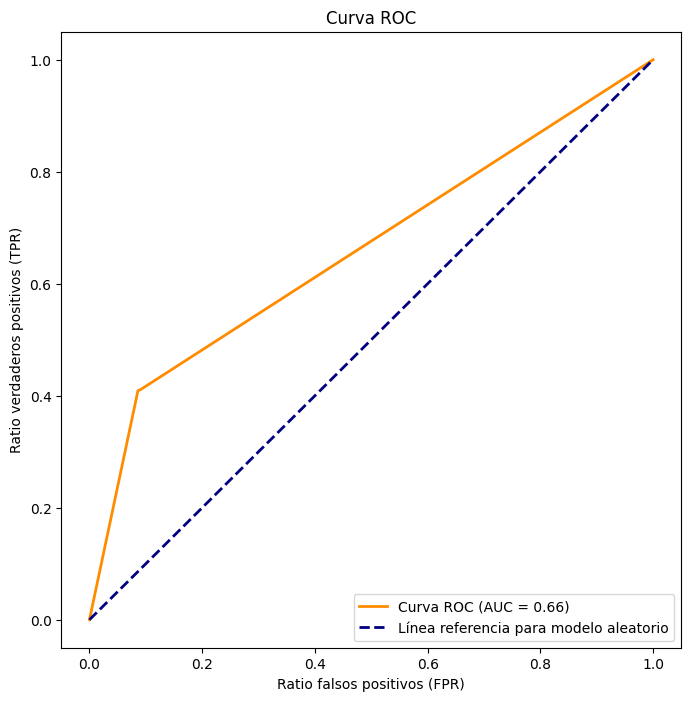

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positiva_tree) ##fpr: false positive rates, tpr: true positive rate, thresolds: umbrales

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea referencia para modelo aleatorio')
plt.xlabel("Ratio falsos positivos (FPR)")
plt.ylabel("Ratio verdaderos positivos (TPR)")
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Como se osberva, el AUC es mucho más bajo que en el modelo de regreso, al igual que la precisión y el recall, aunque la tasa de acierto si es mayor

### K vecinos

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Por defecto, k = 5
knn = KNeighborsClassifier()

knn.fit(x_train_processed_df, y_train)

preds_knn = knn.predict(x_test_processed_df)

precision = precision_score(y_test, preds_knn, average = 'micro')
recall = recall_score(y_test, preds_knn, average = 'micro')
cm = confusion_matrix(y_test, preds_knn)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.934
Recall 0.934
[[7836   57]
 [ 510  133]]


In [55]:
print('Accuracy en train: ', knn.score(x_train_processed_df, y_train))
print('Accuracy en test: ', knn.score(x_test_processed_df, y_test))

Accuracy en train:  0.9018743109151047
Accuracy en test:  0.9335754451733833


In [56]:
preds_knn = knn.predict(x_test_processed_df) # predicción del conjunto de validación
y_probs_knn = knn.predict_proba(x_test_processed_df) # probabilidades de contratar o no, en el conjunto de test

print(preds_knn[:5])
print(y_probs_knn[:5])

[0 0 0 0 0]
[[0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]]


In [57]:
y_probs_positiva_knn = y_probs_knn[:, 1]

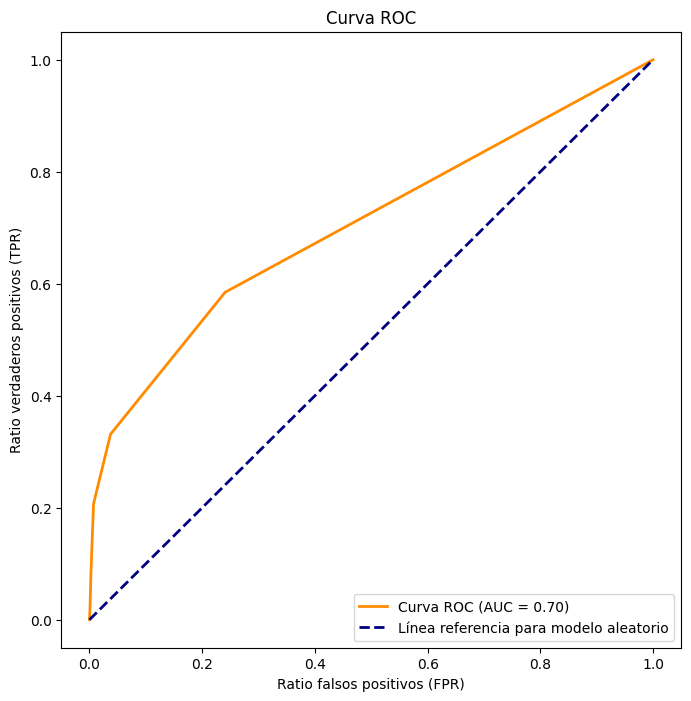

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positiva_knn) ##fpr: false positive rates, tpr: true positive rate, thresolds: umbrales

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea referencia para modelo aleatorio')
plt.xlabel("Ratio falsos positivos (FPR)")
plt.ylabel("Ratio verdaderos positivos (TPR)")
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

La curva AUC es de 0.70, sigue siendo menor que la lograda por la regresión logística. igual me aventuro a ver qué ocurre con los puntos de corte (umbrales de probabilidad) y el balance óptimo con este modelo. Efectivamente el modelo no predice un balance tan bueno como lo hizo el modelo de regresión logística

Umbral (Punto de corte) 0.00 | Precisión: 0.075, Recall: 1.000
Umbral (Punto de corte) 0.01 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.02 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.03 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.04 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.05 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.06 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.07 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.08 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.09 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.10 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.11 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.12 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.13 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.14 | Precisión: 0.165, Recall: 0.585
Umbral (Punto de corte) 0.15 | Precisión: 0.165, Recall

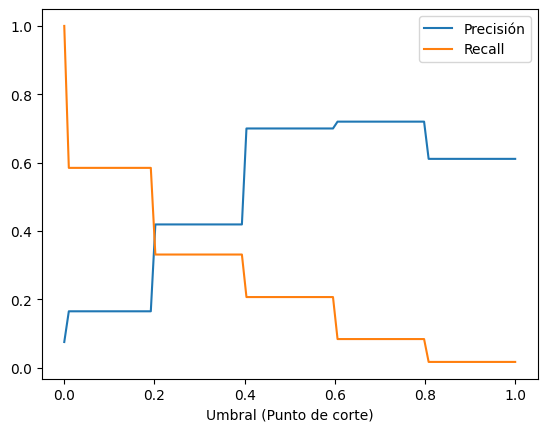

In [59]:
# umbrales (Puntos de corte) posibles
umbrales = np.linspace(0, 1, 100) 

precisions = []
recalls = []

# Probamos cada uno de ellos y calculamos sus métricas
for umbral in umbrales:
    # y_pred Es un array de predicciones binarias basadas en el umbral.
    #Si la probabilidad es mayor o igual al umbral, la predicción se establece en 1 (positivo), de lo contrario, se establece en 0 (negativo).
    y_pred_knn = y_probs_positiva_knn >= umbral 
    precision = precision_score(y_test, y_pred_knn)
    recall = recall_score(y_test, y_pred_knn)
    precisions.append(precision)
    recalls.append(recall)
    
    print('Umbral (Punto de corte) %.2f | Precisión: %.3f, Recall: %.3f' % (umbral, precision, recall))
    
plt.plot(umbrales, precisions, label = 'Precisión')
plt.plot(umbrales, recalls, label = 'Recall')
plt.xlabel('Umbral (Punto de corte)')
plt.legend()
plt.show()

In [62]:
# defino la función de cálculo

def calcular_balance(clientes_contratan_knn, clientes_contactados_knn): # dos argumentos: clientes_contratan y clientes_contactados.
    beneficio_por_contratacion_knn = 50 #beneficio obtenido por cada cliente que contrata el producto (
    costo_por_llamada_knn = 5 #costo de realizar una llamada
    balance_knn = beneficio_por_contratacion_knn * clientes_contratan_knn - costo_por_llamada_knn * clientes_contactados_knn #calculo del balance
    return balance_knn

# calculo el balance para cada umbral 

balances_knn = [] # inicializo la lista de balances para que allí se guarde cada iteración
clientes_a_contactar_por_umbral_knn = [] # inicializo los clientes a contactar por umbral
clientes_contratan_por_umbral_knn = []
for umbral in umbrales: #bucle sobra cada umbral 
    y_pred_knn = y_probs_positiva_knn >= umbral #crea un array de predicciones binarias basado en si la probabilidad es mayor o igual al umbral actual
    clientes_contactados_knn = np.sum(y_pred_knn) #cuenta cuántos clientes serían contactados (predicciones positivas).
    clientes_contratan_knn = np.sum(y_pred_knn & y_test) #cuenta cuántos de los contactados realmente contratan (verdaderos positivos).
    balance_knn = calcular_balance(clientes_contratan_knn, clientes_contactados_knn)
    balances_knn.append(balance) #Se calcula el balance para el umbral actual y se añade a la lista balances.
    clientes_a_contactar_por_umbral_knn.append(clientes_contactados_knn)  
    clientes_contratan_por_umbral_knn.append(clientes_contratan_knn) 
    
    print(f"Umbral: {umbral:.2f}, Clientes a Contactar: {clientes_contactados_knn}, Clientes contratan {clientes_contratan_knn}, Balance: {balance_knn}")
    
# encuentro el mejor umbral
    
indice_optimo_knn = np.argmax(balances_knn) #devuelve el índice del mayor valor en la lista balances, es decir, el balance más alto.
umbral_optimo_knn = umbrales[indice_optimo_knn] # obtiene el valor del umbral correspondiente al mejor balance.
balance_optimo_knn = balances[indice_optimo_knn] # obtiene el valor del balance óptimo.

print(f"Umbral óptimo: {umbral_optimo_knn}, Balance óptimo: {balance_optimo_knn}")



Umbral: 0.00, Clientes a Contactar: 8536, Clientes contratan 643, Balance: -10530
Umbral: 0.01, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.02, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.03, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.04, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.05, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.06, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.07, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.08, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.09, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.10, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.11, Clientes a Contactar: 2276, Clientes contratan 376, Balance: 7420
Umbral: 0.12, Clientes a Contactar: 22

Se observa que no se llega al balance que si llegó el modelo de Regresión Logística 